# Distributed learning (15 minutes)
ACPSEM Machine Learning Workshop 2019, 29 - 31 May 2019

Yu Sun, yu.sun@sydney.edu.au

University of Sydney

There are many aspects about distributed learning, e.g.
* Map: Given a large dataset, how can we divide the training load to multiple servers? For example, a centralised clinical centre have a large amount of data. It may allocate the resources from several satelite hospitals to do part of the training.
* Reduce: If multiple models have been trained seperately, how can we merge the result back? For example, different clinical centres may prefer not to share the data, but instead train a model locally and share the model. Back to the central server, how to use these models to make a consensus decision is the question.

In general, these two step is called "Map-Reduce". It is a widely used strategy for big data analysis.

In this session, we will look at the situation that:
* We have a dataset and divide the task to different centres;
* Each centre has trained a model locally;
* You have all the models and will "merge" them to make a decision using majority vote.

This tutorial focuses in the data flow instead of the 'merging' technique. 

## Code


In [0]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC
from sklearn.model_selection import KFold

In [0]:
# Generate the dummy data and 
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)

# Standardise the data (to mean 0, std 1)
X = StandardScaler().fit_transform(X)

In [0]:
# Visualise the data
# First we define a function to do the scatter plot
def plotData(x, y, title='Title'):
  'Scatter plot of the x, colour indicated by y'
  import matplotlib.pyplot as plt
  import matplotlib.patches as mpatches
  plt.style.use('ggplot')
  plt.scatter(x[:,0], x[:, 1], 
              c=y, 
              cmap=ListedColormap(['orange', 'darkcyan']), # for 0 and 1
              edgecolors='k',
              s=80)
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.title(title)
  patches = (mpatches.Patch(color='orange', label='Negative'),
             mpatches.Patch(color='darkcyan', label='Positive'))
  plt.legend(handles=patches)
  plt.show()

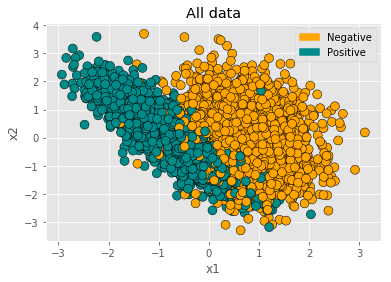

In [0]:
plotData(X, y, 'All data')

In [0]:
# Hold out some test data for consensus assessment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4000, 2) (1000, 2) (4000,) (1000,)


In [0]:
# We then assign the training data to 4 sites
# This could be 4 hospitals in real-world scenarios
kf = KFold(n_splits=4)
kf.get_n_splits(X_train)
site_data = []
for _ignore, index in kf.split(X_train):
  site_X_train = X_train[index, :]
  site_y_train = y_train[index]
  site_data.append({'X':site_X_train, 'y':site_y_train})

In [0]:
# Check the number of data for each site
print('The row number of data for Site 1 is', site_data[0]['X'].shape[0])

The row number of data for Site 1 is 1000


It should be 1000, because for the 5000 samples in total, 1000 held out for testing, and 1000 allocated for each of the site.

Exercise: check the row number for other sites.

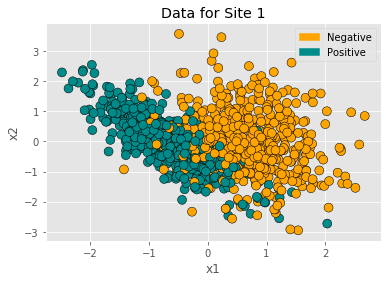

In [0]:
# Plot the data for site 1
plotData(site_data[0]['X'], site_data[0]['y'], 'Data for Site 1')

Exercise: plot the data for other sites, make sure they have similar distributions.

In [0]:
# Fit a model using the first site
data = site_data[0]

Exervise:

1. Review the code yesterday `Part 1` to develop a SVM model using the data at site 1. Hint: from site 1 ponit of view, the `data` is all it has. So you have to hold out some data as test data at that site in order to assess the performance.

2. Use a `for` loop to develop the models for the remaning sites and save all models in an object called `models`;

3. For the test data we held out for consensus testing (`X_test` and `y_test`). For each sample, you will have a prediction from each of the models at 4 sites. Use a majority vote to decide the consensus decision. For example, if 3 models predict as "positive" (1), 1 predicts as "negative" (0), decision is "positive"



---

This is the end of this session.